In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/football-match-probability-prediction/sample_submission.csv
/kaggle/input/football-match-probability-prediction/train.csv
/kaggle/input/football-match-probability-prediction/test.csv


In [2]:
train = pd.read_csv("../input/football-match-probability-prediction/train.csv", dtype=object)
train.head()

,id,target,home_team_name,away_team_name,match_date,league_name,league_id,is_cup,home_team_coach_id,away_team_coach_id,...,away_team_history_league_id_1,away_team_history_league_id_2,away_team_history_league_id_3,away_team_history_league_id_4,away_team_history_league_id_5,away_team_history_league_id_6,away_team_history_league_id_7,away_team_history_league_id_8,away_team_history_league_id_9,away_team_history_league_id_10
0,11906497,away,Newell's Old Boys,River Plate,2019-12-01 00:45:00,Superliga,636,False,468196.0,468200.0,...,1122.0,642.0,636.0,636.0,636.0,1122.0,636.0,642.0,636.0,1122.0
1,11984383,home,Real Estelí,Deportivo Las Sabanas,2019-12-01 01:00:00,Primera Division,752,False,516788.0,22169161.0,...,752.0,752.0,752.0,752.0,752.0,752.0,752.0,752.0,752.0,752.0
2,11983301,draw,UPNFM,Marathón,2019-12-01 01:00:00,Liga Nacional,734,False,2510608.0,456313.0,...,734.0,734.0,734.0,734.0,734.0,734.0,734.0,734.0,734.0,734.0
3,11983471,away,León,Morelia,2019-12-01 01:00:00,Liga MX,743,False,1552508.0,465797.0,...,743.0,743.0,743.0,743.0,743.0,743.0,743.0,743.0,746.0,743.0
4,11883005,home,Cobán Imperial,Iztapa,2019-12-01 01:00:00,Liga Nacional,705,False,429958.0,426870.0,...,705.0,705.0,705.0,705.0,705.0,705.0,705.0,705.0,705.0,705.0


### Start by looking at what sort of features we do have in the provided training dataset:

In [3]:
print(len(list(train.columns)),list(train.columns))

190 ['id', 'target', 'home_team_name', 'away_team_name', 'match_date', 'league_name', 'league_id', 'is_cup', 'home_team_coach_id', 'away_team_coach_id', 'home_team_history_match_date_1', 'home_team_history_match_date_2', 'home_team_history_match_date_3', 'home_team_history_match_date_4', 'home_team_history_match_date_5', 'home_team_history_match_date_6', 'home_team_history_match_date_7', 'home_team_history_match_date_8', 'home_team_history_match_date_9', 'home_team_history_match_date_10', 'home_team_history_is_play_home_1', 'home_team_history_is_play_home_2', 'home_team_history_is_play_home_3', 'home_team_history_is_play_home_4', 'home_team_history_is_play_home_5', 'home_team_history_is_play_home_6', 'home_team_history_is_play_home_7', 'home_team_history_is_play_home_8', 'home_team_history_is_play_home_9', 'home_team_history_is_play_home_10', 'home_team_history_is_cup_1', 'home_team_history_is_cup_2', 'home_team_history_is_cup_3', 'home_team_history_is_cup_4', 'home_team_history_is_cup

### One by one, we'll look at features and try to understand what potential they have:

**Match Dates**

In [4]:
column_name_list = ["home_team_history_match_date_" + str(i) for i in np.arange(1,11,1)]
column_name_list.insert(0, "match_date")
train[column_name_list][train.home_team_name =="Arsenal"].head(1)

,match_date,home_team_history_match_date_1,home_team_history_match_date_2,home_team_history_match_date_3,home_team_history_match_date_4,home_team_history_match_date_5,home_team_history_match_date_6,home_team_history_match_date_7,home_team_history_match_date_8,home_team_history_match_date_9,home_team_history_match_date_10
1182,2019-12-05 20:15:00,2019-12-01 14:00:00,2019-11-28 20:00:00,2019-11-23 15:00:00,2019-11-09 17:30:00,2019-11-06 15:50:00,2019-11-02 15:00:00,2019-10-30 19:30:00,2019-10-27 16:30:00,2019-10-24 19:00:00,2019-10-21 19:00:00


It seems like we can decide:
- whether it is a night fixture or day fixture,
- a winter or summer game,
- fatigue, congestion and inherent injury information by looking at the tightness of the last 10 fixtures
-----

**Goals and Ratings**

1- Can we infer opponents' names for each game, by looking at the other data instances?

2- What is the relationship between goal difference and ratings for each game?

In [5]:
# find english premier league id in the dataset using the arsenal game discovered earlier on
print(train.loc[1182].league_name, train.loc[1182].league_id)

Premier League 8


In [6]:
# for each Arsenal game in the PL, create a dictionary to hold previous PL encounters where 
# keys are dates, and values are the results in the form (Is_Home, Result)

arsenal_home_encounters = dict()

cond1 = train.league_id == '8' # premier league
cond2 = train.is_cup == "False" # not a cup game
cond3 = train.home_team_name == 'Arsenal'# arsenal plays at home


train_subset = train[cond3  &  cond1 & cond2]
# record the match ids in a list to iterate later on
train_subset_ids = list(train_subset["id"])

train_subset.head(2)


,id,target,home_team_name,away_team_name,match_date,league_name,league_id,is_cup,home_team_coach_id,away_team_coach_id,...,away_team_history_league_id_1,away_team_history_league_id_2,away_team_history_league_id_3,away_team_history_league_id_4,away_team_history_league_id_5,away_team_history_league_id_6,away_team_history_league_id_7,away_team_history_league_id_8,away_team_history_league_id_9,away_team_history_league_id_10
1182,11867366,away,Arsenal,Brighton & Hove Albion,2019-12-05 20:15:00,Premier League,8,False,148.0,452683.0,...,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,27.0,8.0
4005,11867386,away,Arsenal,Manchester City,2019-12-15 16:30:00,Premier League,8,False,148.0,455361.0,...,2.0,8.0,8.0,8.0,2.0,8.0,8.0,2.0,8.0,27.0


In [7]:
for id_n in train_subset_ids:
    for i in np.arange(1,11,1):
        if list(train_subset[train_subset.id == id_n][train_subset['home_team_history_is_cup_'+str(i)] == "0.0"])[0]:
            match_date = train_subset[train_subset.id == id_n]['home_team_history_match_date_' + str(i)].item()
            is_home = train_subset[train_subset.id == id_n]['home_team_history_is_play_home_' + str(i)].item()
            conceded = train_subset[train_subset.id == id_n]['home_team_history_goal_' + str(i)].item()
            scored = train_subset[train_subset.id == id_n]['home_team_history_opponent_goal_' + str(i)].item()
            result = "home" if scored > conceded else ("away" if scored < conceded else "draw")
            arsenal_home_encounters[match_date] = (is_home, result)
        else:
            pass


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
# check whether for each recorded arsenal game, whether there is an entry in the dataframe with the 
# exact date, result, and arsenal as away team or home team. if no opponent can be found, 
# simply record None
opponents = []
for date, result_tuple in arsenal_home_encounters.items():
    cond1 = train.match_date == date
    cond2 = train.target == result_tuple[1]
    if result_tuple[0] == '1.0':
        cond3 = train.home_team_name == 'Arsenal'
        try:
            opponents.append(train[cond1 & cond2 & cond3].away_team_name.item())
        except:
            opponents.append(None)
    else:
        cond3 = train.away_team_name == 'Arsenal'
        try:
            opponents.append(train[cond1 & cond2 & cond3].home_team_name.item())
        except:
            opponents.append(None)


In [9]:
print(opponents[0:20])

['Norwich City', None, None, None, None, None, None, None, None, None, 'Standard Liège', 'West Ham United', None, 'AFC Bournemouth', 'Everton', None, None, 'Crystal Palace', None, None]


So it seems the answer to the first question is NO. We can infer some of the opponents names, but more than half of the history matches do not reside in the dataset themselves.

Let's pick 6 PL teams randomly and try to figure out whether there is a correlation between the the goal differences and the ratings given:

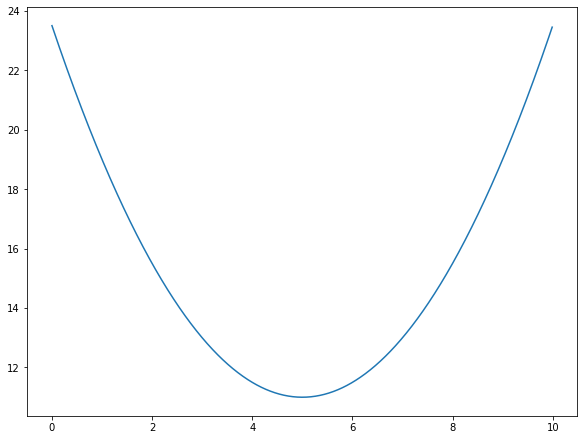

In [10]:
# plot the recorded dates of each match in the premier league
import matplotlib.pyplot as plt

fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(8,6), constrained_layout=True)

# find the match dates
dates = [d[0:10] for d in train[train.league_id == "8"].match_date]

# plot a quadratic curve, with a minimum at y = 11
x = np.arange(0,10,0.01)
y = ((x-5)**2)/2 + 11
axes.plot(x,y)


In [11]:
goal_rating_corr = [(train.loc[1182]["home_team_history_goal_" + str(i)],\
                     train.loc[1182]["home_team_history_opponent_goal_" + str(i)],\
                     train.loc[1182]["home_team_history_rating_" + str(i)])\
                    for i in np.arange(1,11,1)]
goal_rating_corr

[('2.0', '2.0', '9.009262499999998'),
 ('1.0', '2.0', '8.16719117647059'),
 ('2.0', '2.0', '9.89391'),
 ('0.0', '2.0', '6.1982423076923086'),
 ('1.0', '1.0', '7.7749299999999995'),
 ('1.0', '1.0', '8.898857692307692'),
 ('5.0', '5.0', '4.9274249999999995'),
 ('2.0', '2.0', '10.462050000000001'),
 ('3.0', '2.0', '11.791743333333331'),
 ('0.0', '1.0', '7.72679705882353')]

****